In [399]:
# LIBRAIRIES IMPORT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [400]:
# DATA IMPORT
netflix = pd.read_csv('./data/imdb_processed.csv')
netflix.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [401]:
# DATASET DESCRIPTION
## Shape
nb_rows_original = netflix.shape[0]
netflix.shape

(8451, 14)

In [402]:
## Column names and dtypes
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8451 non-null   int64  
 1   title       8451 non-null   object 
 2   year        8451 non-null   float64
 3   kind        8451 non-null   object 
 4   genre       8384 non-null   object 
 5   rating      8135 non-null   float64
 6   vote        8135 non-null   float64
 7   country     8152 non-null   object 
 8   language    8052 non-null   object 
 9   cast        8280 non-null   object 
 10  director    7140 non-null   object 
 11  composer    5722 non-null   object 
 12  writer      7204 non-null   object 
 13  runtime     6798 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 924.5+ KB


In [403]:
## Missing values
netflix.isna().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

In [404]:
# DATA DROPPING
## Columns dropping
### 'Unnamed: 0' is useless
netflix.drop('Unnamed: 0', axis = 1, inplace=True)

In [405]:
### We don't need the title
netflix.drop('title', axis = 1, inplace = True)

In [406]:
# 'composer' has too many missing values
netflix.drop('composer', axis = 1, inplace = True)

In [407]:
# 'runtime' has many missing values too
netflix.drop('runtime', axis = 1, inplace=True)

In [408]:
## Rows dropping
# Are the 316 rows without 'rating' and 'vote' the same?
netflix.loc[netflix.rating.isna() & netflix.vote.isna()].shape

(316, 10)

In [409]:
# They are the same, we can drop the rows
netflix.dropna(axis = 0, subset='rating', inplace=True)

In [410]:
# Are the rows without director and writer essentialy the same?
netflix.loc[netflix.director.isna() & netflix.writer.isna()].shape

(263, 10)

In [411]:
# Intersection is only 263 rows

In [412]:
# We drop the writer column (intuitively not essential) and then the rows without director
netflix.drop('writer', axis = 1, inplace = True)
netflix.dropna(axis = 0, subset = 'director', inplace = True)

In [413]:
# Let's check what missing values are left
netflix.isna().sum()

year          0
kind          0
genre        23
rating        0
vote          0
country      87
language    122
cast         48
director      0
dtype: int64

In [414]:
# Few rows with missing value, we can drop them
netflix.dropna(inplace = True)

In [451]:
np.round(netflix.shape[0]/nb_rows_original, 4)

0.805

In [452]:
# We have kept more than 80% of the original number of records

In [416]:
# VALUE ANALYSIS
## Year
netflix.year.describe()

count    6803.000000
mean     1991.144054
std        15.221808
min      1914.000000
25%      1986.000000
50%      1997.000000
75%      2002.000000
max      2005.000000
Name: year, dtype: float64

In [417]:
### Bins by decade - eventually not used as it would generate too many categories

#netflix['period'] = pd.cut(netflix.year, bins = [1900, 1960, 1970, 1980, 1990, 2000, 2010], right = False)

#fig = plt.figure(figsize=(12,8))
#ax = fig.add_subplot(111)
#sns.countplot(netflix.period, ax=ax)
#fig.show()

In [418]:
### Encoding in 3 categories

netflix.loc[netflix.year < 1990, 'before_90s'] = 1
netflix.loc[(netflix.year >= 1990) & (netflix.year < 2000), '90s'] = 1
netflix.loc[netflix.year >= 2000, '2000s'] = 1
netflix['before_90s'].fillna(0, inplace = True)
netflix['90s'].fillna(0, inplace = True)
netflix['2000s'].fillna(0, inplace = True)

In [419]:
### We can drop the original column
netflix.drop('year', axis = 1, inplace = True)

In [420]:
## Kind

netflix.kind.value_counts()

movie          4862
video movie     949
tv movie        702
episode         276
tv short         12
video game        2
Name: kind, dtype: int64

In [421]:
### We group the low-frequency kinds into 'other'

other_kinds = ['episode', 'tv short', 'video game']
for k in other_kinds:
    netflix.kind = np.where(netflix.kind == k, 'other', netflix.kind)

In [422]:
### Dummy encoding
netflix = pd.concat([netflix, pd.get_dummies(netflix.kind)], axis = 1)

In [423]:
# We can drop the original column
netflix.drop('kind', axis = 1, inplace = True)

In [424]:
## Genres

### Get unique genres and count them
genres = {}
for i in range(len(netflix)):
    for g in netflix.genre.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if g.strip() not in genres.keys():
            genres[g.strip()] = 1
        else:
            genres[g.strip()] +=1

In [425]:
### Sort by frequency
import operator
dict(sorted(genres.items(), key=operator.itemgetter(1),reverse=True))

{'Drama': 3171,
 'Comedy': 1992,
 'Romance': 1354,
 'Thriller': 1230,
 'Action': 1190,
 'Documentary': 1001,
 'Crime': 919,
 'Adventure': 786,
 'Music': 723,
 'Horror': 716,
 'Sci-Fi': 643,
 'Family': 584,
 'Fantasy': 553,
 'Mystery': 519,
 'Animation': 425,
 'Biography': 402,
 'History': 328,
 'War': 303,
 'Musical': 282,
 'Sport': 180,
 'Short': 158,
 'Western': 132,
 'Film-Noir': 26,
 'Talk-Show': 5,
 'Reality-TV': 5,
 'News': 2,
 'Game-Show': 1}

In [426]:
### Let's keep only genres with more 1,000 occurrences (top 6)
genres_kept = []
for k,v in genres.items():
    if v > 1000:
        genres_kept.append(k)
genres_kept.append('Other_genre')
genres_kept

['Action',
 'Documentary',
 'Comedy',
 'Drama',
 'Thriller',
 'Romance',
 'Other_genre']

In [427]:
### Encode genres (dummy-like)
#### Create genre columns
netflix = pd.concat([netflix, pd.DataFrame(columns=genres_kept)], axis = 1)

In [428]:
#### Encoding with 1
for i in range(len(netflix)):
    for g in netflix.genre.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if g.strip() in genres_kept:
            netflix[g.strip()].iloc[i] = 1
        else:
            netflix['Other_genre'].iloc[i] = 1

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_14078/3422481802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Other_genre'].iloc[i] = 1
/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_14078/3422481802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix[g.strip()].iloc[i] = 1


In [429]:
#### Fill NaNs with 0
for g in genres_kept:
    netflix[g].fillna(0, inplace=True)

In [430]:
#### Drop original column
netflix.drop('genre', axis = 1, inplace = True)

In [431]:
## Actors

### Get unique actors and count them
actors = {}
for i in range(len(netflix)):
    for a in netflix.cast.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if a.strip() not in actors.keys():
            actors[a.strip()] = 1
        else:
            actors[a.strip()] +=1
dict(sorted(actors.items(), key=operator.itemgetter(1),reverse=True))

{'Frank Welker': 70,
 'Jackie Chan': 46,
 'Amitabh Bachchan': 44,
 'Jeff Bennett': 44,
 'Adolf Hitler': 39,
 'Ronald Reagan': 37,
 'Tress MacNeille': 35,
 'Richard Nixon': 33,
 'Jim Cummings': 33,
 'Greg Bronson': 33,
 'Rob Paulsen': 33,
 'Johnny Lever': 33,
 'James Earl Jones': 32,
 'Bill Clinton': 31,
 'Kirk Thornton': 30,
 'John F. Kennedy': 30,
 'Andy Lau': 30,
 'Bess Flowers': 30,
 'Mick Jagger': 29,
 'Eric Clapton': 29,
 'Guy Standeven': 29,
 'Fred Wood': 29,
 'Frank Sinatra': 29,
 'Phil Hawn': 29,
 'Samuel L. Jackson': 29,
 'Shah Rukh Khan': 28,
 'Kôichi Yamadera': 28,
 'Corey Burton': 28,
 'Harry Fielder': 28,
 'Elvis Presley': 28,
 'John Nettles': 27,
 'Daniel Casey': 27,
 'Jane Wymark': 27,
 'Steve Martin': 27,
 'Dinesh Hingoo': 27,
 'Kenner G. Kemp': 27,
 'Michael Sorich': 26,
 'Martin Luther King': 26,
 'Biao Yuen': 26,
 'Mona Marshall': 26,
 'Sam Harris': 26,
 'Christopher Lee': 26,
 'Amrish Puri': 26,
 'Whoopi Goldberg': 25,
 'George W. Bush': 25,
 'Megumi Hayashibara': 2

In [432]:
### How many different actors do we have?
len(actors)

134739

In [433]:
### The most frequent actor is Frank Welter, but only appears 70 times i.e. in less than 1% of the dataset
### Too much variance, we can drop the column
netflix.drop('cast', axis = 1, inplace=True)

In [434]:
## Directors

### Get unique directors and count them
directors = {}
for i in range(len(netflix)):
    for d in netflix.director.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if d.strip() not in directors.keys():
            directors[d.strip()] = 1
        else:
            directors[d.strip()] +=1
dict( sorted(directors.items(), key=operator.itemgetter(1),reverse=True))

{'Kevin Dunn': 23,
 'Akira Kurosawa': 20,
 'Jing Wong': 18,
 'Beth McCarthy-Miller': 17,
 'Federico Fellini': 16,
 'Jim Wynorski': 16,
 'David Mallet': 15,
 'Tom Clegg': 15,
 'Alfred Hitchcock': 15,
 'Johnnie To': 14,
 'Takashi Miike': 14,
 'Werner Herzog': 14,
 'Jeb Brien': 13,
 'Dave Wilson': 13,
 'Jon Stone': 13,
 'Andrew Lau': 13,
 'Ishirô Honda': 13,
 'Rainer Werner Fassbinder': 12,
 'Sammo Kam-Bo Hung': 12,
 'Lawrence Jordan': 12,
 'François Truffaut': 12,
 'Ingmar Bergman': 11,
 'Michael Apted': 11,
 'Jean Rollin': 11,
 'Mario Bava': 11,
 'Jean-Luc Godard': 10,
 'Corey Yuen': 10,
 'Daisuke Nishio': 10,
 'Woo-Ping Yuen': 10,
 'Hark Tsui': 10,
 'Kevin Murphy': 10,
 'Robert Altman': 10,
 'Woody Allen': 10,
 'Steven Spielberg': 10,
 'Claude Chabrol': 9,
 'Joseph Sargent': 9,
 'Rocco Urbisci': 9,
 'Lance Bangs': 9,
 'Marty Callner': 9,
 'Jackie Chan': 9,
 'Vittorio De Sica': 9,
 'George Miller': 9,
 'Kunihiko Yuyama': 9,
 'Bruce Gowers': 8,
 'Hamish Hamilton': 8,
 'Jeremy Silberston'

In [435]:
### How many different directors do we have?
len(directors)

4511

In [436]:
### The most frequent director is Kevin Dunn, but only appears 23 times i.e. in less than 1% of the dataset
### Too much variance, we can drop the column
netflix.drop('director', axis = 1, inplace = True)

In [437]:
## Country

### Get unique countries and count them
countries = {}
for i in range(len(netflix)):
    for c in netflix.country.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if c.strip() not in countries.keys():
           countries[c.strip()] = 1
        else:
            countries[c.strip()] +=1
dict( sorted(countries.items(), key=operator.itemgetter(1),reverse=True))

{'United States': 3880,
 'United Kingdom': 1093,
 'France': 604,
 'Canada': 451,
 'Japan': 435,
 'Hong Kong': 301,
 'Germany': 281,
 'Italy': 274,
 'India': 255,
 'Spain': 140,
 'Australia': 130,
 'West Germany': 88,
 'Mexico': 65,
 'China': 56,
 'Sweden': 56,
 'Netherlands': 56,
 'Ireland': 51,
 'Taiwan': 49,
 'South Korea': 46,
 'Switzerland': 44,
 'Denmark': 43,
 'Belgium': 40,
 'Soviet Union': 35,
 'Argentina': 29,
 'South Africa': 29,
 'New Zealand': 28,
 'Czechia': 24,
 'Poland': 24,
 'Israel': 22,
 'Brazil': 21,
 'Austria': 21,
 'Romania': 19,
 'Iran': 15,
 'Philippines': 15,
 'Hungary': 15,
 'Portugal': 14,
 'Norway': 14,
 'Thailand': 13,
 'Russia': 13,
 'Luxembourg': 13,
 'Bulgaria': 12,
 'Finland': 12,
 'Cuba': 8,
 'Jamaica': 6,
 'Czechoslovakia': 6,
 'Singapore': 6,
 'Iceland': 6,
 'Peru': 6,
 'Greece': 6,
 'Yugoslavia': 6,
 'Vietnam': 5,
 'Federal Republic of Yugoslavia': 4,
 'Colombia': 3,
 'Liechtenstein': 3,
 'Tunisia': 3,
 'Morocco': 3,
 'Turkey': 3,
 'Algeria': 2,
 'Ir

In [438]:
### Let's keep only countries with more 500 occurrences (i.e. top 3)
countries_kept = []
for k,v in countries.items():
    if v > 500:
        countries_kept.append(k)
countries_kept.append('Other_country')
countries_kept

['United States', 'United Kingdom', 'France', 'Other_country']

In [439]:
### Encode country
#### Create country columns
netflix = pd.concat([netflix, pd.DataFrame(columns=countries_kept)], axis = 1)

In [440]:
#### Encoding with 1
for i in range(len(netflix)):
    for c in netflix.country.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if c.strip() in countries_kept:
            netflix[c.strip()].iloc[i] = 1
        else:
            netflix['Other_country'].iloc[i] = 1

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_14078/3461056937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix[c.strip()].iloc[i] = 1
/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_14078/3461056937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Other_country'].iloc[i] = 1


In [441]:
#### Fill NaNs with 0
for c in countries_kept:
    netflix[c].fillna(0, inplace=True)

In [442]:
#### Drop original column
netflix.drop('country', axis =1, inplace = True)

In [443]:
## Language

### Get unique languages and count them
languages = {}
for i in range(len(netflix)):
    for l in netflix.language.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if l.strip() not in languages.keys():
           languages[l.strip()] = 1
        else:
            languages[l.strip()] +=1
dict( sorted(languages.items(), key=operator.itemgetter(1),reverse=True))

{'English': 5401,
 'French': 645,
 'Japanese': 440,
 'Spanish': 363,
 'German': 313,
 'Italian': 305,
 'Cantonese': 269,
 'Hindi': 248,
 'Mandarin': 176,
 'Russian': 131,
 'Latin': 83,
 'Arabic': 59,
 'Portuguese': 51,
 'Korean': 51,
 'Hebrew': 48,
 'Swedish': 48,
 'Polish': 35,
 'Danish': 30,
 'Thai': 29,
 'Greek': 29,
 'Vietnamese': 26,
 'Czech': 24,
 'None': 23,
 'Dutch': 23,
 'Urdu': 18,
 'Yiddish': 18,
 'Persian': 17,
 'Turkish': 17,
 'Romanian': 16,
 'Serbian': 14,
 'Hungarian': 14,
 'Norwegian': 12,
 'Tamil': 11,
 'Tagalog': 10,
 'Chinese': 9,
 'Min Nan': 9,
 'American Sign Language': 9,
 'Kurdish': 8,
 'Afrikaans': 8,
 'Filipino': 8,
 'Swahili': 8,
 'Bulgarian': 8,
 'Serbo-Croatian': 7,
 'Bangla': 7,
 'Catalan': 7,
 'Albanian': 6,
 'Finnish': 6,
 'Zulu': 6,
 'Irish': 5,
 'Maori': 5,
 'Ancient (to 1453)': 5,
 'Icelandic': 5,
 'Sioux': 5,
 'Slovak': 5,
 'British Sign Language': 4,
 'Hokkien': 4,
 'Hakka': 4,
 'Romany': 4,
 'Quechua': 4,
 'Croatian': 4,
 'Bosnian': 4,
 'Esperanto'

In [444]:
### Let's keep only languages with more than 1,000 occurrences (i.e. English)
languages_kept = []
for k,v in languages.items():
    if v > 1000:
        languages_kept.append(k)
languages_kept.append('Other_language')
languages_kept

['English', 'Other_language']

In [445]:
### Encode country
####  Create country columns
netflix = pd.concat([netflix, pd.DataFrame(columns=languages_kept)], axis = 1)

In [446]:
#### Encoding with 1
for i in range(len(netflix)):
    for l in netflix.language.iloc[i].replace('[','').replace(']','').replace("'","").split(','):
        if l.strip() in languages_kept:
            netflix[l.strip()].iloc[i] = 1
        else:
            netflix['Other_language'].iloc[i] = 1

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_14078/310707368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix[l.strip()].iloc[i] = 1
/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_14078/310707368.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Other_language'].iloc[i] = 1


In [447]:
#### Filling NaNs with 0
for l in languages_kept:
    netflix[l].fillna(0, inplace=True)

In [448]:
#### Drop original column
netflix.drop('language', axis =1, inplace = True)

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote'>

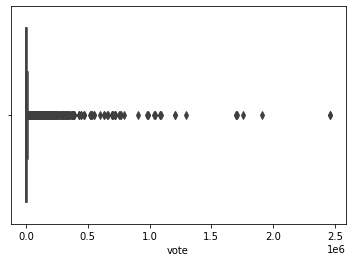

In [449]:
## Vote: it will be our target variable for machine learning

### Convert to integers
netflix.vote = netflix.vote.astype(int)

### Boxplot to see distribution
sns.boxplot(netflix.vote)

In [453]:
### Many outliers outside
### We are interested in the top 10% (movies we want to promote to clients) and the bottom 10% (movies we want to hide from clients)
bottom_1O_pct_threshold = int(netflix.vote.quantile(0.1))
print(f'Bottom 10% threshold: {bottom_1O_pct_threshold}')
top_10_pct_threshold = int(netflix.vote.quantile(0.9))
print(f'Top 10% threshold: {top_10_pct_threshold}')

Bottom 10% threshold: 118
Top 10% threshold: 34272


In [454]:
### Label encoding
netflix.loc[netflix.vote <= bottom_1O_pct_threshold, 'vote_quantile'] = 'bottom_10_pct'
netflix.loc[netflix.vote >= top_10_pct_threshold, 'vote_quantile'] = 'top_10_pct'
netflix.vote_quantile.fillna('soft_belly', inplace = True)

In [455]:
### Drop original column
netflix.drop('vote', axis = 1, inplace = True)

In [456]:
# FINAL VIEW
netflix.head()

,rating,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,vote_quantile
1,8.1,0.0,1.0,0.0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,bottom_10_pct
2,5.5,0.0,1.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,bottom_10_pct
3,5.3,0.0,0.0,1.0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,soft_belly
4,4.5,0.0,1.0,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,soft_belly
6,8.0,1.0,0.0,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,bottom_10_pct


In [457]:
# EXPORT TO CSV
netflix.to_csv('./data/Netflix.csv')